# Multivariate time series prediction

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

In [ ]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
    %load_ext tensorboard
import tensorflow as tf
tf.__version__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load data:

In [3]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('local/data/raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('local/data/pollution.csv',compression='gzip')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


Let's take a look at the time series:

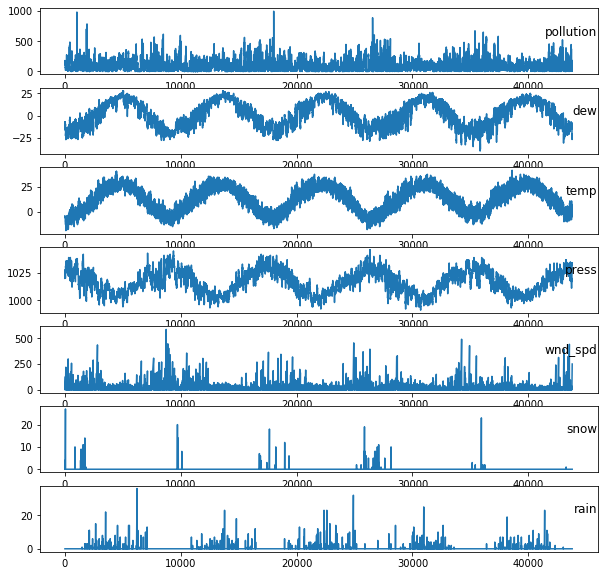

In [4]:
from pandas import read_csv
# load dataset
dataset = read_csv('local/data/pollution.csv', compression='gzip', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(10,10))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [4]:
dataset.columns[0]

'pollution'

## Exercise 1

The aim of this exercise is to test the capacity of recurrent networks to predict future values of pollution based on past vallues of pollution and other siz enviremnetal time series. Create three models: one based on conventional RNNs, one based on LSTM and a last one based on GRU units. Compare the performance of the models predicting one step forward. For all the models use one recurrent layer with 20 neurons. Test the model for different lacks between 1 and 5, and compare the performance of the models when pollution information is part of the input time series and also when it is excluded from the input.

### Solution:

The original data is organized in a matrix where rows are observations and columns are variables.

First of all, create a function to format the data as the model requires: [n_samples,n_times,n_features]

Takes as reference the following function where the input dataset is a univariate time series:

In [103]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [10]:
%load_ext tensorboard
#%reload_ext tensorboard
%tensorboard --logdir logs/fit

Please remeber to set the seeds of the random number generators in every experiment.

In [ ]:
seed(1)
tf.random.set_seed(2)

These are the results you should get:

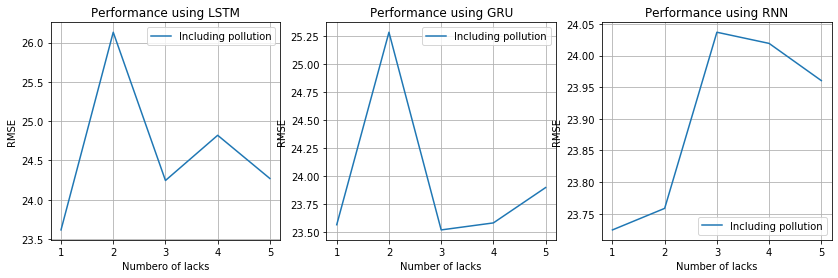

In [13]:
look_back = range(1,6)
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.plot(look_back,mse[0,:],label='Including pollution')
plt.xlabel('Numbero of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
#---------------------------------------------------------
plt.title('Performance using LSTM')
plt.subplot(132)
plt.plot(look_back,mse[1,:],label='Including pollution')
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
#---------------------------------------------------------
plt.title('Performance using GRU')
plt.subplot(133)
plt.plot(look_back,mse[2,:],label='Including pollution')
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.title('Performance using RNN')
plt.show()

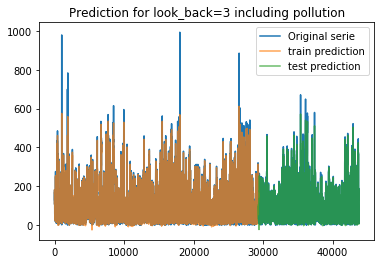

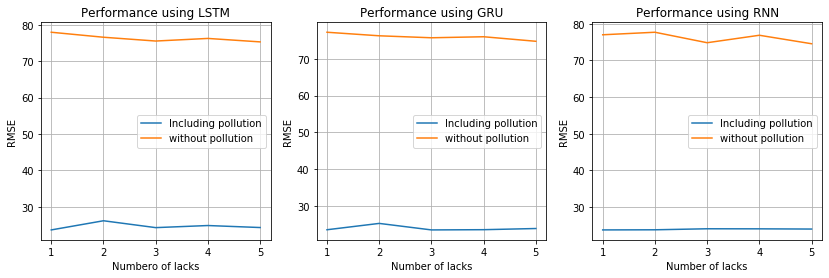

In [18]:
look_back = range(1,6)
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.plot(look_back,mse[0,:],label='Including pollution')
plt.plot(look_back,mse2[0,:],label='without pollution')
plt.xlabel('Numbero of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
#---------------------------------------------------------
plt.title('Performance using LSTM')
plt.subplot(132)
plt.plot(look_back,mse[1,:],label='Including pollution')
plt.plot(look_back,mse2[1,:],label='without pollution')
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
#----------------------------------------------------------
plt.title('Performance using GRU')
plt.subplot(133)
plt.plot(look_back,mse[2,:],label='Including pollution')
plt.plot(look_back,mse2[2,:],label='without pollution')
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.title('Performance using RNN')
plt.show()

## Excercise 2

Repeat the exercise one using crossvalidation and include the confidence interval in the plot.

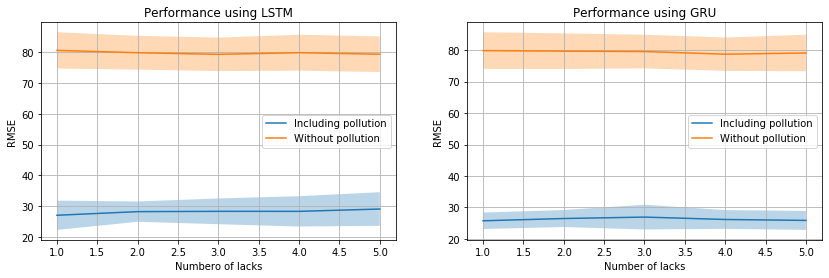

In [22]:
look_back = range(1,6)

fig, ax = plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(look_back,meanRMSE3[0,:],label='Including pollution')
plt.fill_between(look_back, meanRMSE3[0,:] + stdRMSE3[0,:], meanRMSE3[0,:] - stdRMSE3[0,:], alpha=0.3,edgecolor="")
plt.plot(look_back,meanRMSE4[0,:],label='Without pollution')
plt.fill_between(look_back, meanRMSE4[0,:] + stdRMSE4[0,:], meanRMSE4[0,:] - stdRMSE4[0,:], alpha=0.3, edgecolor="")
plt.xlabel('Numbero of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.title('Performance using LSTM')
#------------------------------------------------------------
plt.subplot(122)
plt.plot(look_back,meanRMSE3[1,:],label='Including pollution')
plt.fill_between(look_back, meanRMSE3[1,:] + stdRMSE3[1,:], meanRMSE3[1,:] - stdRMSE3[1,:], alpha=0.3, edgecolor="")
plt.plot(look_back,meanRMSE4[1,:],label='Without pollution')
plt.fill_between(look_back, meanRMSE4[1,:] + stdRMSE4[1,:], meanRMSE4[1,:] - stdRMSE4[1,:], alpha=0.3, edgecolor="")
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.title('Performance using GRU')
plt.show()

## Excercise 3

Create three models: one using RNN, another one using GRU and a last one using LSTM layers, to predict air pollution at [3,6,9] times ahead. For all the networks define regular architecture with one recurrent layer of 50 neurons/cells and use the walk forward approach to make the predictions.

Text(0.5, 1.0, 'Performance prediction for 3 times ahead using walk forward strategy')

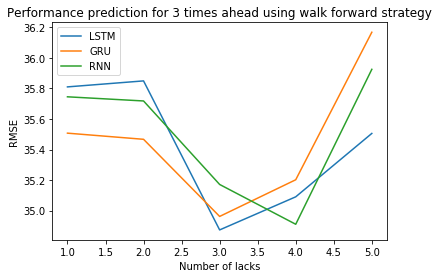

In [77]:
look_back = range(1,6)
plt.figure()
plt.plot(look_back,mse[0,:],label='LSTM')
plt.plot(look_back,mse[1,:],label='GRU')
plt.plot(look_back,mse[2,:],label='RNN')
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.title('Performance prediction for 3 times ahead using walk forward strategy')

Text(0.5, 1.0, 'Performance prediction for 6 times ahead using walk forward strategy')

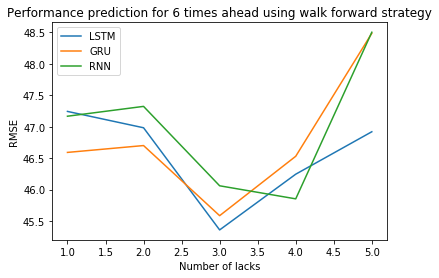

In [79]:
look_back = range(1,6)
plt.figure()
plt.plot(look_back,mse[0,:],label='LSTM')
plt.plot(look_back,mse[1,:],label='GRU')
plt.plot(look_back,mse[2,:],label='RNN')
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.title('Performance prediction for 6 times ahead using walk forward strategy')

Text(0.5, 1.0, 'Performance prediction for 9 times ahead using walk forward strategy')

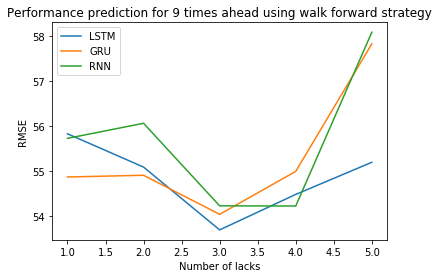

In [81]:
look_back = range(1,6)
plt.figure()
plt.plot(look_back,mse[0,:],label='LSTM')
plt.plot(look_back,mse[1,:],label='GRU')
plt.plot(look_back,mse[2,:],label='RNN')
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.title('Performance prediction for 9 times ahead using walk forward strategy')

## Excercise 4

Similar to the former excersice, create three recurrent neural networks to predict air pollution at [3,6,9] times ahead, using Encoder-Decoder architectures. Use 20 neurons/cells in every layer of the network.

Text(0.5, 1.0, 'Performance prediction for 3 times ahead using encoder-decoder strategy')

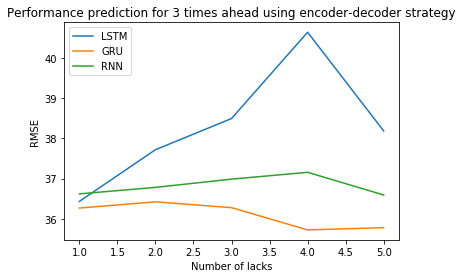

In [98]:
look_back = range(1,6)
plt.figure()
plt.plot(look_back,mse[0,:],label='LSTM')
plt.plot(look_back,mse[1,:],label='GRU')
plt.plot(look_back,mse[2,:],label='RNN')
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.title('Performance prediction for 3 times ahead using encoder-decoder strategy')

Text(0.5, 1.0, 'Performance prediction for 6 times ahead using encoder-decoder strategy')

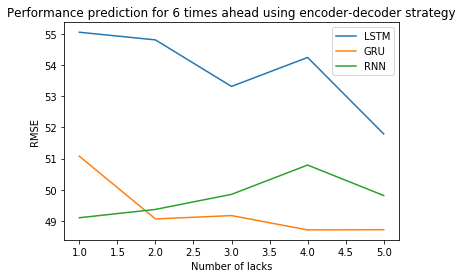

In [100]:
look_back = range(1,6)
plt.figure()
plt.plot(look_back,mse[0,:],label='LSTM')
plt.plot(look_back,mse[1,:],label='GRU')
plt.plot(look_back,mse[2,:],label='RNN')
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.title('Performance prediction for 6 times ahead using encoder-decoder strategy')

Text(0.5, 1.0, 'Performance prediction for 9 times ahead using encoder-decoder strategy')

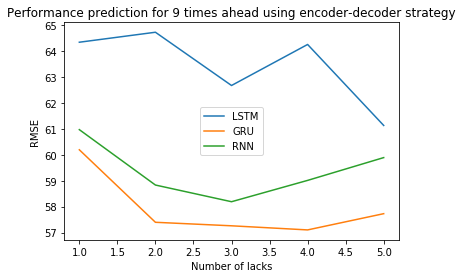

In [102]:
look_back = range(1,6)
plt.figure()
plt.plot(look_back,mse[0,:],label='LSTM')
plt.plot(look_back,mse[1,:],label='GRU')
plt.plot(look_back,mse[2,:],label='RNN')
plt.xlabel('Number of lacks')
plt.ylabel('RMSE')
plt.legend()
plt.title('Performance prediction for 9 times ahead using encoder-decoder strategy')